In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.9.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\gkgiz\Desktop\CF\Achievement 6\absenteeism_data_cleaned.csv', index_col = False)

In [5]:
sub = df[['Age', 'LengthService', 'AbsentHours']]

In [6]:
sub

,Age,LengthService,AbsentHours
0,32.028816,6.018478,36.577306
1,40.320902,5.532445,30.165072
2,48.822047,4.389973,83.807798
3,44.599357,3.081736,70.020165
4,35.697876,3.619091,0.000000
...,...,...,...
8251,46.057544,4.838288,93.665111
8252,34.455490,2.427274,0.000000
8253,58.347160,4.009393,176.356940
8254,43.340616,6.154837,60.321917


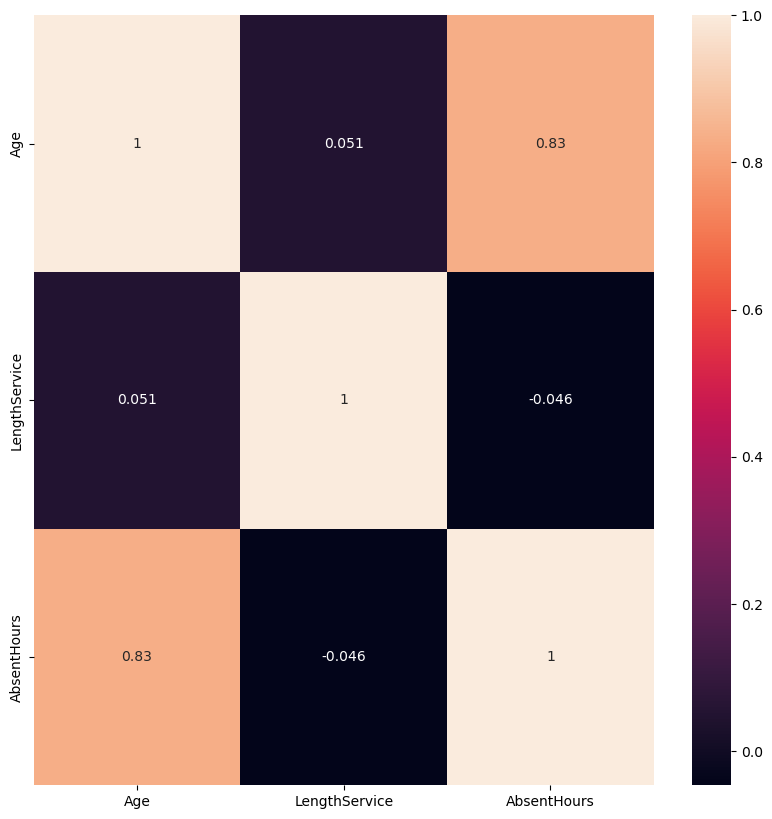

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))
corr = sns.heatmap(sub.corr(), annot=True, ax=ax)

plt.show()  # Ensure the plot is displayed

0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relations

Therefore, we can say that there is a strong positive correlation between Age and Absent Hours and almost no relationship between age and Length of Service. My primary questions for this exercise included the following: Is there a correlation between age and absenteeism rates? Do younger or older employees tend to have higher absenteeism? How does length of service affect absenteeism rates? Do newer employees tend to have higher absenteeism compared to those who have been with the organization longer? and Is there a threshold of length of service beyond which absenteeism significantly decreases? I can now answer the first two questions with some degree of confidence, however all 3 require more in depth analysis for more confident answers. 
hip

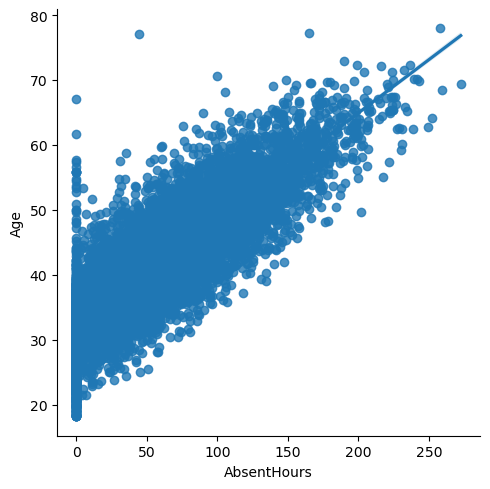

In [9]:
sns.lmplot(x = 'AbsentHours', y = 'Age', data = df)
plt.show()  # Ensure the plot is displayed

From the plot, there appears to be a positive correlation, indicating that as age increases, the number of hours absent tends to increase as well. This trend suggests that older individuals may have higher absenteeism rates compared to younger ones.

However, there is some spread in the data, with many points deviating from the main trend line, indicating that factors other than age may also influence absenteeism. There are also some outliers, such as individuals with high absenteeism at various ages, which could indicate exceptional cases.

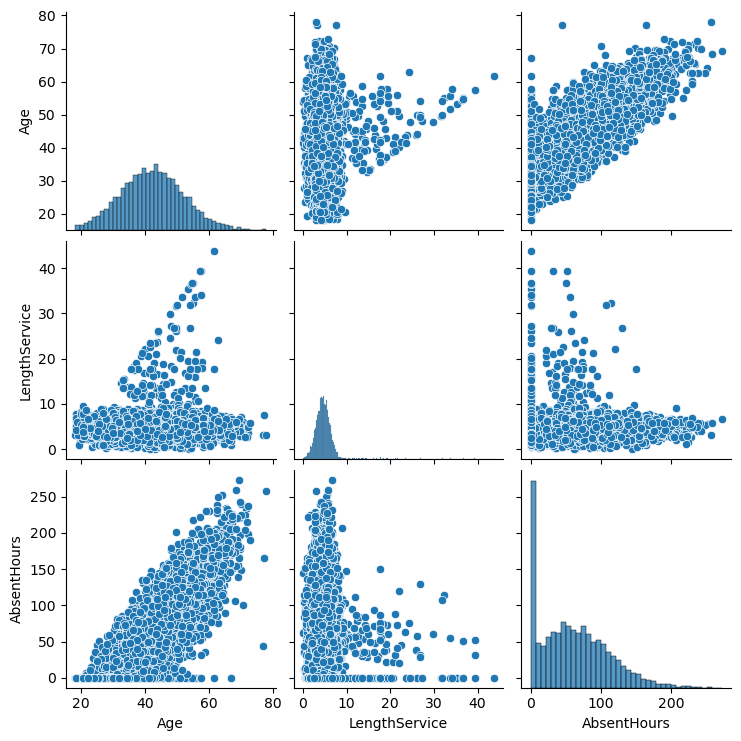

In [11]:
# Step 5:  Create a pair plot of the entire data set
g = sns.pairplot(df)
plt.show()  # Ensure the plot is displayed

Age vs. Absent Hours: There is a positive correlation between age and absent hours, indicating that older employees tend to have more absenteeism. This relationship is consistent with the previous scatter plot.

Age vs. Length of Service: There is a visible pattern where employees who are older also tend to have a longer length of service. This is expected, as older individuals are more likely to have been with the organization longer.

Length of Service vs. Absent Hours: The scatter plot for these variables shows a concentration of points where the length of service is low (less than 10 years), but there isn’t a clear trend relating length of service to absenteeism. It seems that having a longer service does not directly correlate with more absenteeism.

#Histograms

Age: The distribution appears to be fairly symmetric, centered around the 30–40 age range.
Length of Service: Most employees have a short length of service, with the distribution skewed towards lower values.
Absent Hours: The distribution is right-skewed, indicating that while most employees have lower absenteeism, there are a few cases with very high absent hours.
Overall, the plots suggest that age has a more notable relationship with absenteeism than length of service does. There might be other factors contributing to absenteeism that are not accounted for in these variables. And this plot also renders my last question mentioned above (threshold of length of service when it comes to absenteeism rates) irrelevant.

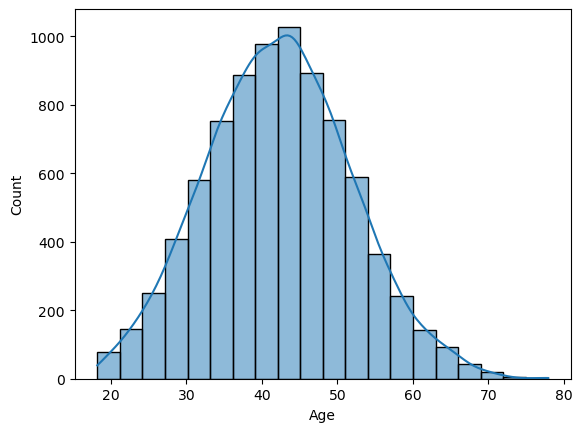

In [13]:
# Step 6: Create a categorical plot

# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Age'], bins = 20, kde =' True)
plt.show()

In [41]:
df.loc[df['Age'] < 40, 'Age category'] = 'Young Age'

In [43]:
df.loc[(df['Age'] >= 40) & (df['Age'] < 65), 'Age category'] = 'Middle Age'

In [45]:
df.loc[df['Age'] >= 65, 'Age category'] = 'Old Age'

In [47]:
df['Age category'].value_counts(dropna = False)

Age category
Middle Age    4755
Young Age     3409
Old Age         92
Name: count, dtype: int64

C:\Users\gkgiz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


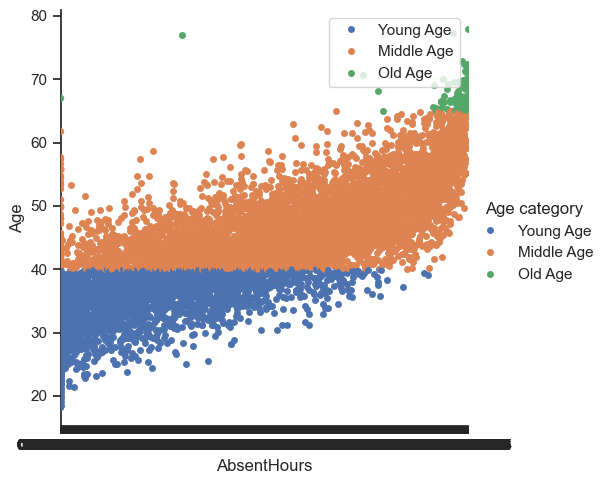

In [53]:
sns.set(style="ticks")
g = sns.catplot(x="AbsentHours", y="Age", hue="Age category", data=df)
plt.legend(loc='upper right')
plt.show()

# Step 7: Answer the questions from the first exercise
Is there a correlation between age and absenteeism rates? Do younger or older employees tend to have higher absenteeism?There is a positive correlation between age and absent hours, indicating that older employees tend to have more absenteeism. 

How does length of service affect absenteeism rates? Do newer employees tend to have higher absenteeism compared to those who have been with the organization longer?Length of Service vs. Absent Hours: The scatter plot for these variables shows a concentration of points where the length of service is low (less than 10 years), but there isn’t a clear trend relating length of service to absenteeism. It seems that having a longer service does not directly correlate with more absenteeism.

Is there a threshold of length of service beyond which absenteeism significantly decreases?
Not relevant

How does absenteeism vary by gender? Are there significant differences in absenteeism rates between male and female employees?Female employees seem to be absent slightly more than male employees.






Hypothesis: There is a positive correlation between age and absenteeism rates, suggesting that older employees are more likely to have higher absenteeism than younger employees.

Hypothesis: Length of service does not have a significant impact on absenteeism rates. Employees with shorter or longer tenures at the organization have similar absenteeism patterns.

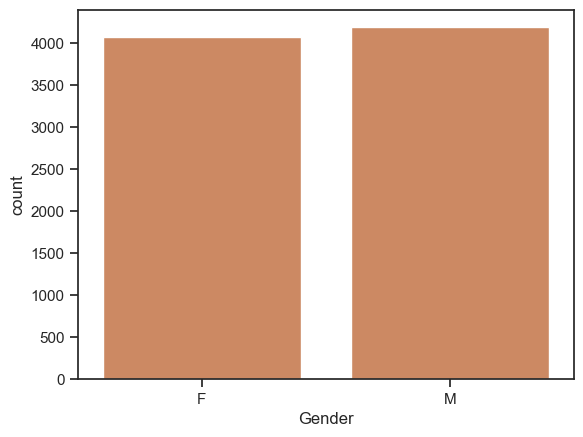

In [74]:
# Bonus
sns.countplot(x='Gender', data=df)

plt.show()

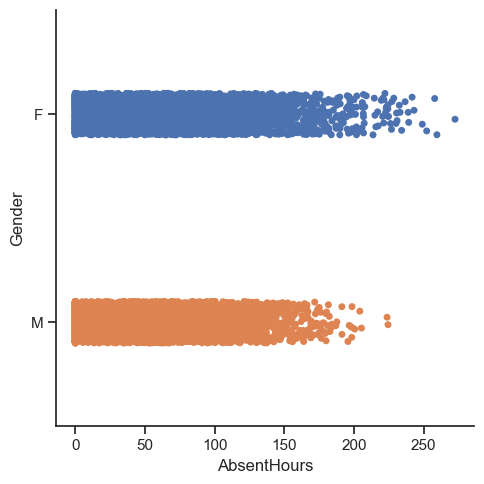

In [76]:
sns.set(style="ticks")
g = sns.catplot(x="AbsentHours", y="Gender", hue="Gender", data=df)
plt.show()

In [78]:
category_counts = df['Gender'].value_counts().reset_index()
category_counts.columns = ['Gender', 'Count']

print(category_counts)

  Gender  Count
0      M   4186
1      F   4070
